In [1]:
# Работа со случайным лесом и градиентным бустингом

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from sklearn import datasets 

iris = datasets.load_iris()

In [4]:
# предсказание вида цветка по внешним характеристикам

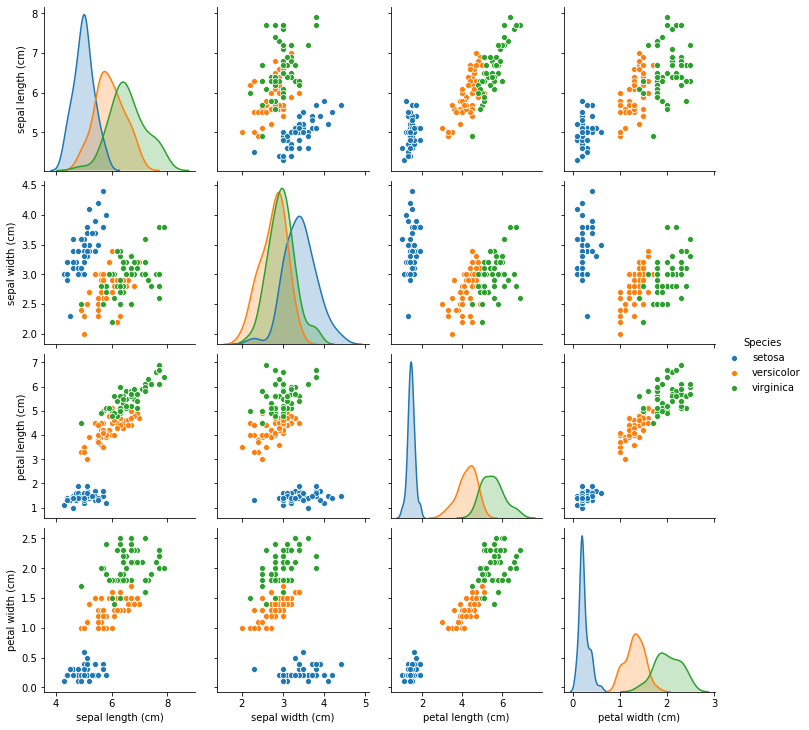

In [5]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['Species'] = np.array([iris.target_names[cls] for cls in iris.target])
sns.pairplot(iris_df, hue='Species');



In [6]:
# построим ансамблевую модель для зеленых и красных классов
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split



In [7]:
rd_forest = RandomForestClassifier(n_estimators=100, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target,
    test_size=0.3, stratify=iris.target, random_state=42
)
rf_model = rd_forest.fit(x_train, y_train)



In [9]:
predict = rf_model.predict(x_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predict)))

Accuracy: 0.89


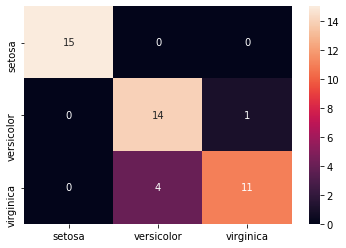

In [11]:
# посчитаем ошибки и метрики качества модели

conf_score = confusion_matrix(y_test, predict)
conf_df = pd. DataFrame(conf_score, columns=iris.target_names, index=iris.target_names)
sns.heatmap(conf_df, annot=True);


In [12]:
# проверим у каких признаков наибольшая предсказательная способность

feature_importance = list(zip(iris.feature_names, rf_model.feature_importances_))
feature_importance_df = pd.DataFrame(feature_importance, columns=['Feature', 'RF Importance'])
feature_importance_df



,Feature,RF Importance
0,sepal length (cm),0.120608
1,sepal width (cm),0.024273
2,petal length (cm),0.400227
3,petal width (cm),0.454892


In [14]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [16]:
# РЕШИТЬ ЗАДАЧУ КЛАССИФИКАЦИИ ПО МЕТОДУ ГРАДИЕНТНОГО БУСТИНГА


from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model = grad_boost.fit(x_train, y_train)

print('Accuracy: {:.2f}'.format(gb_model.score(x_test, y_test)))



Accuracy: 0.96


In [17]:
feature_importance_df['GB Importance'] = gb_model.feature_importances_
feature_importance_df



,Feature,RF Importance,GB Importance
0,sepal length (cm),0.120608,0.010722
1,sepal width (cm),0.024273,0.010274
2,petal length (cm),0.400227,0.339782
3,petal width (cm),0.454892,0.639223


In [19]:
gb_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}